In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.io import fits
import cmasher as cmr # Import CMasher to register colormaps
import os
import matplotlib.patches as patches


# Read in the PSF Subtracted Data

In [2]:
f300m_roll1_filename = "/home/maxmb/Library/jwst_hd141569a_lib/data/F300M/jk/231108/jw01386117001_03106_00001_nrcalong_calints_mstar_subtracted_MCRDI_psf_subtracted.fits"
f300m_roll2_filename = "/home/maxmb/Library/jwst_hd141569a_lib/data/F300M/jk/231108/jw01386118001_03106_00001_nrcalong_calints_mstar_subtracted_MCRDI_psf_subtracted.fits"
f360m_roll1_filename = "/home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/jw01386117001_03107_00001_nrcalong_calints_mstar_subtracted_MCRDI_psf_subtracted.fits"
f360m_roll2_filename = "/home/maxmb/Library/jwst_hd141569a_lib/data/F360M/jk/231108/jw01386118001_03107_00001_nrcalong_calints_mstar_subtracted_MCRDI_psf_subtracted.fits"


f300m_roll1_hdul = fits.open(f300m_roll1_filename)
f300m_roll2_hdul = fits.open(f300m_roll2_filename)
f360m_roll1_hdul = fits.open(f360m_roll1_filename)
f360m_roll2_hdul = fits.open(f360m_roll2_filename)

f300m_roll1_data = f300m_roll1_hdul[0].data
f300m_roll2_data = f300m_roll2_hdul[0].data
f360m_roll1_data = f360m_roll1_hdul[0].data
f360m_roll2_data = f360m_roll2_hdul[0].data

# Convert the data to uJy/arcsec

In [3]:
conversion_factor_f300m = f300m_roll1_hdul[1].header["PHOTUJA2"]/f300m_roll1_hdul[1].header["PHOTMJSR"]
conversion_factor_f360m = f360m_roll1_hdul[1].header["PHOTUJA2"]/f360m_roll1_hdul[1].header["PHOTMJSR"]

f300m_roll1_data *= conversion_factor_f300m
f300m_roll2_data *= conversion_factor_f300m
f360m_roll1_data *= conversion_factor_f360m
f360m_roll2_data *= conversion_factor_f360m

# Data Shape and other array things

In [4]:
data_shape = f300m_roll1_data.shape
pixel_scale_f300m = np.sqrt(f300m_roll1_hdul[1].header['PIXAR_A2'])

#Coronagraphic center: 
coron_center = [173.4,149.1]

#F300M - pixel sizes and plotting range. 
x_size_f300m = f300m_roll1_data.shape[1]
y_size_f300m = f300m_roll1_data.shape[0]
x_f300m = np.arange(x_size_f300m)
y_f300m = np.arange(y_size_f300m)
x_f300m = (x_f300m-coron_center[1])*pixel_scale_f300m
y_f300m = (y_f300m-coron_center[0])*pixel_scale_f300m
xx_f300m,yy_f300m = np.meshgrid(x_f300m,y_f300m)

# Plot Setup

In [5]:
max_box_size = 40
f300m_vmax = np.max(f300m_roll1_data[int(coron_center[0])-max_box_size:int(coron_center[0])+max_box_size,
                                     int(coron_center[1])-max_box_size:int(coron_center[1])+max_box_size])
f300m_vmax=1400
f300m_vmin = 0
linthresh = 0.1

f360m_vmax = np.max(f360m_roll1_data[int(coron_center[0])-max_box_size:int(coron_center[0])+max_box_size,
                                     int(coron_center[1])-max_box_size:int(coron_center[1])+max_box_size])
f360m_vmax=2200
f360m_vmin = 0

cmap = plt.get_cmap('cmr.freeze')

gamma = 0.3
#Make a Linear LogNorm, SymLogNorm and PowerNorm dictionary: 
norms_f300m = {'linear': mpl.colors.Normalize(vmin=f300m_vmin,vmax=f300m_vmax),
         'log': mpl.colors.LogNorm(vmin=f300m_vmin,vmax=f300m_vmax),
         'symlog': mpl.colors.SymLogNorm(linthresh=linthresh,vmin=f300m_vmin,vmax=f300m_vmax),
         'power': mpl.colors.PowerNorm(gamma=gamma,vmin=f300m_vmin,vmax=f300m_vmax)}

norms_f360m = {'linear': mpl.colors.Normalize(vmin=f360m_vmin,vmax=f360m_vmax),
         'log': mpl.colors.LogNorm(vmin=f360m_vmin,vmax=f360m_vmax),
         'symlog': mpl.colors.SymLogNorm(linthresh=linthresh,vmin=f360m_vmin,vmax=f360m_vmax),
         'power': mpl.colors.PowerNorm(gamma=gamma,vmin=f360m_vmin,vmax=f360m_vmax)}

norm_key = "power"


# Four panel plot

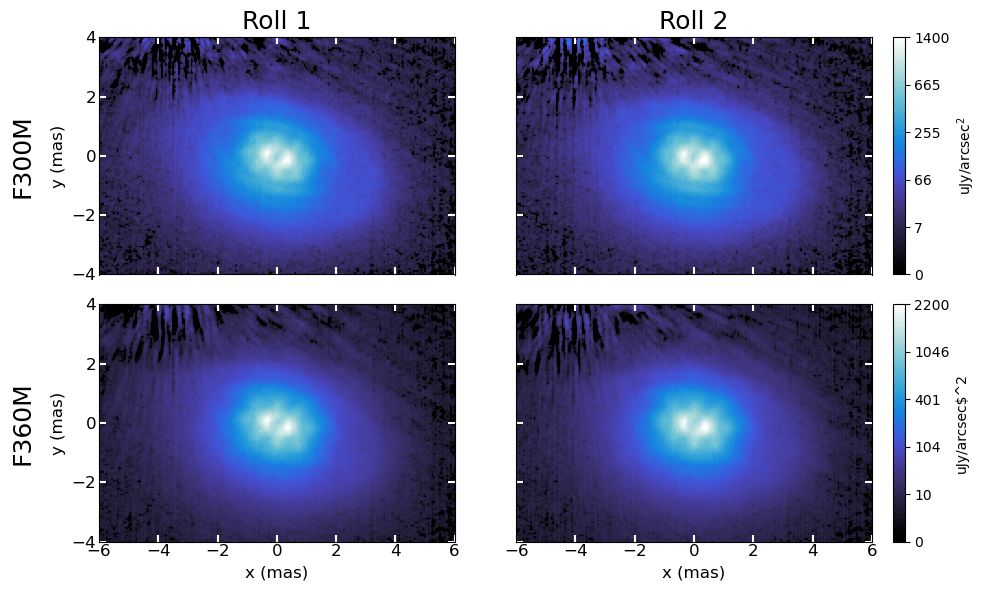

In [6]:
fig,axes = plt.subplots(2,2,figsize=(10,6))
axes = axes.flatten()

im0 = axes[0].imshow(f300m_roll1_data,origin='lower',
             cmap=cmap,norm = norms_f300m[norm_key],
             extent=[x_f300m[0],x_f300m[-1],y_f300m[0],y_f300m[-1]])
im1 = axes[1].imshow(f300m_roll2_data,origin='lower',
             cmap=cmap,norm = norms_f300m[norm_key],
             extent=[x_f300m[0],x_f300m[-1],y_f300m[0],y_f300m[-1]])

im2 = axes[2].imshow(f360m_roll1_data,origin='lower',
             cmap=cmap,norm = norms_f360m[norm_key],
             extent=[x_f300m[0],x_f300m[-1],y_f300m[0],y_f300m[-1]])
im3 = axes[3].imshow(f360m_roll2_data,origin='lower',
            cmap=cmap,norm = norms_f360m[norm_key],
            extent=[x_f300m[0],x_f300m[-1],y_f300m[0],y_f300m[-1]])

# cbar1 = plt.colorbar(im1,ax=axes[1],label='uJy/arcsec$^2$',fraction=0.046)
# cbar2 = plt.colorbar(im3,ax=axes[3],label='uJy/arcsec$^2$',fraction=0.046)

#Colorbar tick hacking
n_cbar_ticks = 6
ticks = np.linspace(0,1,n_cbar_ticks)
data_tick_values_f300m = ticks**(1/gamma)*(f300m_vmax-f300m_vmin)+f300m_vmin
data_tick_values_f360m = ticks**(1/gamma)*(f360m_vmax-f360m_vmin)+f360m_vmin
cbar1 = plt.colorbar(im1, ax=axes[1], ticks=data_tick_values_f300m,fraction=0.046,label='uJy/arcsec$^2$')# format=mpl.colors.LogFormatter(labelOnlyBase=False))
cbar2 = plt.colorbar(im3, ax=axes[3], ticks=data_tick_values_f360m,fraction=0.046,label='uJy/arcsec$^2')# format=mpl.colors.LogFormatter(labelOnlyBase=False))

#Filter Labels
axes[0].text(-9, 0, 'F300M', fontsize=18, rotation='vertical', verticalalignment='center')
axes[2].text(-9, 0, 'F360M', fontsize=18, rotation='vertical', verticalalignment='center')


for i in range(len(axes)):
    axes[i].tick_params(axis='both', which='both', labelsize=12, direction='in', pad=2, right=True, top=True, width=1.5, length=5, color='white')

axes[0].set_title("Roll 1", fontsize=18)
axes[1].set_title("Roll 2", fontsize=18)
axes[1].set_yticklabels([]) 
axes[3].set_yticklabels([])
axes[0].set_xticklabels([]) 
axes[1].set_xticklabels([])

# Set up some axis labels
axes[0].set_ylabel('y (mas)', fontsize=12)
axes[2].set_ylabel('y (mas)', fontsize=12)
axes[2].set_xlabel('x (mas)', fontsize=12)
axes[3].set_xlabel('x (mas)', fontsize=12)


axes[0].set_xlim(-6,6)
axes[1].set_xlim(-6,6)
axes[2].set_xlim(-6,6)
axes[3].set_xlim(-6,6)

axes[0].set_ylim(-4,4)
axes[1].set_ylim(-4,4)
axes[2].set_ylim(-4,4)
axes[3].set_ylim(-4,4)


# Save it and show it.
plt.tight_layout()
# fig.savefig("M_star_subtracted_F300M_3panel.png", dpi=300, bbox_inches='tight')
plt.show()

# What if we rotate and combine them? 

In [7]:
roll1_f300m = f300m_roll1_hdul[0].header['GS_V3_PA']
roll2_f300m = f300m_roll2_hdul[0].header['GS_V3_PA']
roll1_f360m = f360m_roll1_hdul[0].header['GS_V3_PA']
roll2_f360m = f360m_roll2_hdul[0].header['GS_V3_PA']

mcrdi_dir = "/home/maxmb/Library/jwst_hd141569a_lib/240122/"
x0_f300m = np.load(os.path.join(mcrdi_dir,"hg3fit_F300M_m_stars_bounded_quad_new.npz.npy"))
x0_f360m = np.load(os.path.join(mcrdi_dir,"hg3fit_F360M_full_params.npy"))
n_nodes = 6
# ref_psf_data1_f360m, ref_psf_data2_f360m = gen_psf_model(x0_f360m,ref_data_f360m)

center1_f300m = [coron_center[0]+x0_f300m[18+4*n_nodes],coron_center[1]+x0_f300m[19+4*n_nodes]]
center2_f300m = [coron_center[0]+x0_f300m[20+4*n_nodes],coron_center[1]+x0_f300m[21+4*n_nodes]]
center1_f360m = [coron_center[0]+x0_f360m[18+4*n_nodes],coron_center[1]+x0_f360m[19+4*n_nodes]]
center2_f360m = [coron_center[0]+x0_f360m[20+4*n_nodes],coron_center[1]+x0_f360m[21+4*n_nodes]]

In [11]:
from pyklip.klip import rotate

roll_offset = -90

derotated_roll1_f300m = rotate(f300m_roll1_data,roll1_f300m+roll_offset,coron_center[::-1],new_center=coron_center[::-1])
derotated_roll2_f300m = rotate(f300m_roll2_data,roll2_f300m+roll_offset,coron_center[::-1],new_center=coron_center[::-1])
combined_f300m = np.mean([derotated_roll1_f300m,derotated_roll2_f300m],axis=0)
derotated_roll1_f360m = rotate(f360m_roll1_data,roll1_f360m+roll_offset,coron_center[::-1],new_center=coron_center[::-1])
derotated_roll2_f360m = rotate(f360m_roll2_data,roll2_f360m+roll_offset,coron_center[::-1],new_center=coron_center[::-1])
combined_f360m = np.mean([derotated_roll1_f360m,derotated_roll2_f360m],axis=0)

#Save the combined data using the header of the first roll, but adding some history comments
combined_hdul = fits.PrimaryHDU(combined_f300m)
combined_hdul.header = f300m_roll1_hdul[0].header
combined_hdul.header['HISTORY'] = "Combined roll 1 and roll 2 data"
combined_hdul.header['HISTORY'] = "Combined using mean"
combined_hdul.header['HISTORY'] = "Rotated by -90 degrees"
combined_hdul.header['HISTORY'] = "Combined using F300M data"
# combined_hdul.header['HISTORY'] = "Combined using F360M data"
combined_hdul.writeto("combined_f300m.fits",overwrite=True)

combined_hdul = fits.PrimaryHDU(combined_f360m)
combined_hdul.header = f360m_roll1_hdul[0].header
combined_hdul.header['HISTORY'] = "Combined roll 1 and roll 2 data"
combined_hdul.header['HISTORY'] = "Combined using mean"
combined_hdul.header['HISTORY'] = "Rotated by -90 degrees"
# combined_hdul.header['HISTORY'] = "Combined using F300M data"
combined_hdul.header['HISTORY'] = "Combined using F360M data"
combined_hdul.writeto("combined_f360m.fits",overwrite=True)


In [12]:
from pyklip.klip import rotate

roll_offset = 0

derotated_roll1_f300m = rotate(f300m_roll1_data,roll1_f300m+roll_offset,coron_center[::-1],new_center=coron_center[::-1])
derotated_roll2_f300m = rotate(f300m_roll2_data,roll2_f300m+roll_offset,coron_center[::-1],new_center=coron_center[::-1])
combined_f300m = np.mean([derotated_roll1_f300m,derotated_roll2_f300m],axis=0)
derotated_roll1_f360m = rotate(f360m_roll1_data,roll1_f360m+roll_offset,coron_center[::-1],new_center=coron_center[::-1])
derotated_roll2_f360m = rotate(f360m_roll2_data,roll2_f360m+roll_offset,coron_center[::-1],new_center=coron_center[::-1])
combined_f360m = np.mean([derotated_roll1_f360m,derotated_roll2_f360m],axis=0)

#Save the combined data using the header of the first roll, but adding some history comments
combined_hdul = fits.PrimaryHDU(combined_f300m)
combined_hdul.header = f300m_roll1_hdul[0].header
combined_hdul.header['HISTORY'] = "Combined roll 1 and roll 2 data"
combined_hdul.header['HISTORY'] = "Combined using mean"
# combined_hdul.header['HISTORY'] = "Rotated by -90 degrees"
combined_hdul.header['HISTORY'] = "Combined using F300M data"
# combined_hdul.header['HISTORY'] = "Combined using F360M data"
combined_hdul.writeto("combined_f300m_north_up.fits",overwrite=True)

combined_hdul = fits.PrimaryHDU(combined_f360m)
combined_hdul.header = f360m_roll1_hdul[0].header
combined_hdul.header['HISTORY'] = "Combined roll 1 and roll 2 data"
combined_hdul.header['HISTORY'] = "Combined using mean"
# combined_hdul.header['HISTORY'] = "Rotated by -90 degrees"
# combined_hdul.header['HISTORY'] = "Combined using F300M data"
combined_hdul.header['HISTORY'] = "Combined using F360M data"
combined_hdul.writeto("combined_f360m_north_up.fits",overwrite=True)


In [9]:
pwd

'/home/maxmb/Library/jwst_ers_NIRCAM_HD141569A/Subtract_PSF'

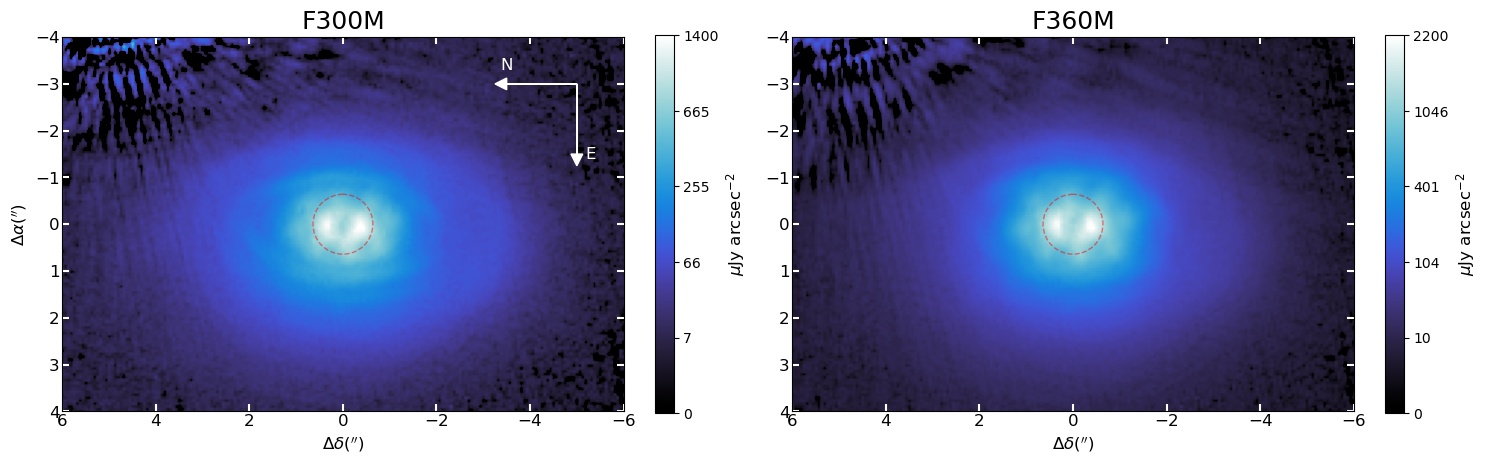

In [9]:
fig,axes = plt.subplots(1,2,figsize=(15,4.5))

im_f300m = axes[0].imshow(combined_f300m,origin='lower',
                cmap=cmap,norm = norms_f300m[norm_key],
                extent=[x_f300m[0],x_f300m[-1],y_f300m[0],y_f300m[-1]])
im_f360m = axes[1].imshow(combined_f360m,origin='lower',
                cmap=cmap,norm = norms_f360m[norm_key],
                extent=[x_f300m[0],x_f300m[-1],y_f300m[0],y_f300m[-1]])



#Make the colorbars have evenly spaced ticks in the power law space
n_cbar_ticks = 6
ticks = np.linspace(0,1,n_cbar_ticks)
data_tick_values_f300m = ticks**(1/gamma)*(f300m_vmax-f300m_vmin)+f300m_vmin
data_tick_values_f360m = ticks**(1/gamma)*(f360m_vmax-f360m_vmin)+f360m_vmin
cbar1 = plt.colorbar(im_f300m, ax=axes[0], ticks=data_tick_values_f300m,fraction=0.046,)# format=mpl.colors.LogFormatter(labelOnlyBase=False))
cbar1.set_label(label=r'$\mu $Jy arcsec$^{-2}$',size=12)
cbar2 = plt.colorbar(im_f360m, ax=axes[1], ticks=data_tick_values_f360m,fraction=0.046)# format=mpl.colors.LogFormatter(labelOnlyBase=False))
cbar2.set_label(label=r'$\mu $Jy arcsec$^{-2}$',size=12)

## Make a Compass rose. 
arrow_length = 1.5
compass_center = [-5,-3]
north_angle = 0
east_angle = -90
head_width = 0.25
head_length = 0.25
# Draw North arrow
axes[0].arrow(compass_center[0], compass_center[1], arrow_length * np.cos(np.radians(north_angle)), -arrow_length * np.sin(np.radians(north_angle)), head_width=head_width, head_length=head_length, fc='w', ec='w')
# Draw North label
axes[0].text(arrow_length * np.cos(np.radians(north_angle))+compass_center[0], -arrow_length * np.sin(np.radians(north_angle))+compass_center[1]-0.4, 'N', color='w', ha='center', va='center',fontsize=12)

# # Draw East arrow
axes[0].arrow(compass_center[0], compass_center[1], arrow_length * np.cos(np.radians(east_angle)), -arrow_length * np.sin(np.radians(east_angle)), head_width=head_width, head_length=head_length, fc='w', ec='w')
# # Draw East label
axes[0].text(arrow_length * np.cos(np.radians(east_angle))+compass_center[0]-0.3, -arrow_length * np.sin(np.radians(east_angle))+compass_center[1], 'E', color='w', ha='center', va='center',fontsize=12)


for i in range(len(axes)):
    axes[i].tick_params(axis='both', which='both', labelsize=12, direction='in', pad=2, right=True, top=True, width=1.5, length=5, color='white')


axes[0].set_xlim(6,-6)
axes[1].set_xlim(6,-6)

axes[0].set_ylim(4,-4)
axes[1].set_ylim(4,-4)

axes[0].set_xlabel(r"$\Delta \delta ('')$",fontsize=12)
axes[0].set_ylabel(r"$\Delta \alpha ('')$",fontsize=12)

axes[1].set_xlabel(r"$\Delta \delta ('')$",fontsize=12)

axes[0].set_title("F300M",fontsize=18)
axes[1].set_title("F360M",fontsize=18)

fpm_radius = 0.64 #Radius of MASK335R
for ax in axes:
    # Create a circle with x and y at the center
    circle = patches.Circle((0.,0.), fpm_radius, edgecolor='red', facecolor='none',linestyle="--",alpha=0.5)

    # Add the circle to the axes
    ax.add_patch(circle)

plt.tight_layout()

plt.savefig("PSF-Subtracted_Disks.png",dpi=300)

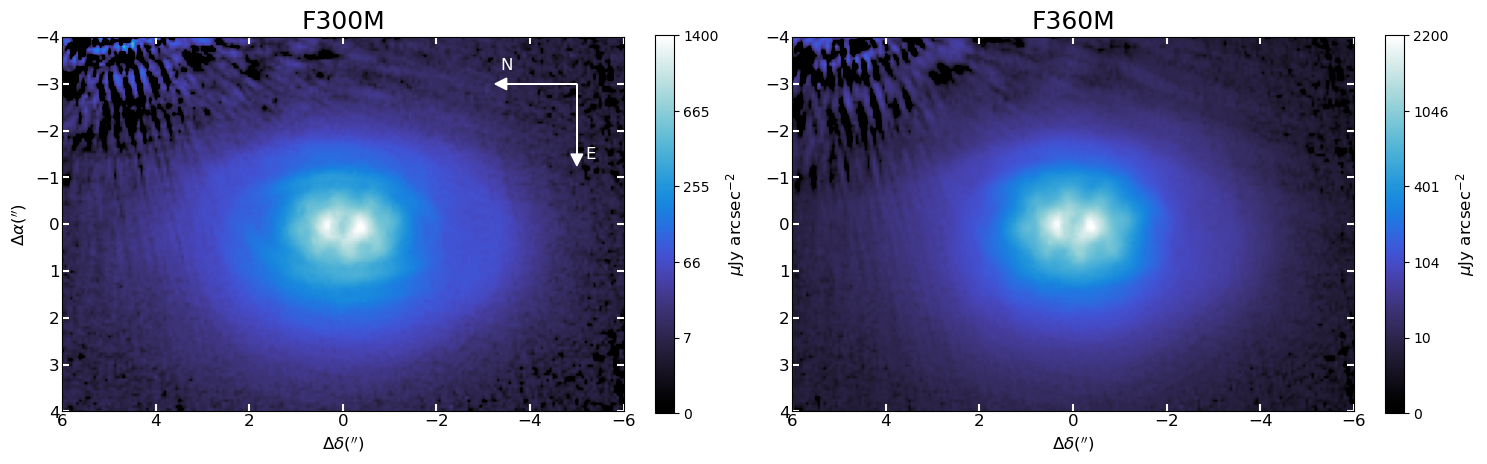

In [11]:
fig,axes = plt.subplots(1,2,figsize=(15,4.5))

im_f300m = axes[0].imshow(combined_f300m,origin='lower',
                cmap=cmap,norm = norms_f300m[norm_key],
                extent=[x_f300m[0],x_f300m[-1],y_f300m[0],y_f300m[-1]])
im_f360m = axes[1].imshow(combined_f360m,origin='lower',
                cmap=cmap,norm = norms_f360m[norm_key],
                extent=[x_f300m[0],x_f300m[-1],y_f300m[0],y_f300m[-1]])



#Make the colorbars have evenly spaced ticks in the power law space
n_cbar_ticks = 6
ticks = np.linspace(0,1,n_cbar_ticks)
data_tick_values_f300m = ticks**(1/gamma)*(f300m_vmax-f300m_vmin)+f300m_vmin
data_tick_values_f360m = ticks**(1/gamma)*(f360m_vmax-f360m_vmin)+f360m_vmin
cbar1 = plt.colorbar(im_f300m, ax=axes[0], ticks=data_tick_values_f300m,fraction=0.046,)# format=mpl.colors.LogFormatter(labelOnlyBase=False))
cbar1.set_label(label=r'$\mu $Jy arcsec$^{-2}$',size=12)
cbar2 = plt.colorbar(im_f360m, ax=axes[1], ticks=data_tick_values_f360m,fraction=0.046)# format=mpl.colors.LogFormatter(labelOnlyBase=False))
cbar2.set_label(label=r'$\mu $Jy arcsec$^{-2}$',size=12)

## Make a Compass rose. 
arrow_length = 1.5
compass_center = [-5,-3]
north_angle = 0
east_angle = -90
head_width = 0.25
head_length = 0.25
# Draw North arrow
axes[0].arrow(compass_center[0], compass_center[1], arrow_length * np.cos(np.radians(north_angle)), -arrow_length * np.sin(np.radians(north_angle)), head_width=head_width, head_length=head_length, fc='w', ec='w')
# Draw North label
axes[0].text(arrow_length * np.cos(np.radians(north_angle))+compass_center[0], -arrow_length * np.sin(np.radians(north_angle))+compass_center[1]-0.4, 'N', color='w', ha='center', va='center',fontsize=12)

# # Draw East arrow
axes[0].arrow(compass_center[0], compass_center[1], arrow_length * np.cos(np.radians(east_angle)), -arrow_length * np.sin(np.radians(east_angle)), head_width=head_width, head_length=head_length, fc='w', ec='w')
# # Draw East label
axes[0].text(arrow_length * np.cos(np.radians(east_angle))+compass_center[0]-0.3, -arrow_length * np.sin(np.radians(east_angle))+compass_center[1], 'E', color='w', ha='center', va='center',fontsize=12)


for i in range(len(axes)):
    axes[i].tick_params(axis='both', which='both', labelsize=12, direction='in', pad=2, right=True, top=True, width=1.5, length=5, color='white')


axes[0].set_xlim(6,-6)
axes[1].set_xlim(6,-6)

axes[0].set_ylim(4,-4)
axes[1].set_ylim(4,-4)

axes[0].set_xlabel(r"$\Delta \delta ('')$",fontsize=12)
axes[0].set_ylabel(r"$\Delta \alpha ('')$",fontsize=12)

axes[1].set_xlabel(r"$\Delta \delta ('')$",fontsize=12)

axes[0].set_title("F300M",fontsize=18)
axes[1].set_title("F360M",fontsize=18)

# fpm_radius = 0.64 #Radius of MASK335R
# for ax in axes:
#     # Create a circle with x and y at the center
#     circle = patches.Circle((0.,0.), fpm_radius, edgecolor='red', facecolor='none',linestyle="--",alpha=0.5)

#     # Add the circle to the axes
    # ax.add_patch(circle)

plt.tight_layout()

plt.savefig("PSF-Subtracted_Disks_no_coronagraph_line.png",dpi=300)